In [1]:
!pip install matplotlib
!{sys.executable} -m pip install matplotlib

You should consider upgrading via the 'python -m pip install --upgrade pip' command.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
train = pd.read_csv('train.csv')

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Values

In [122]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


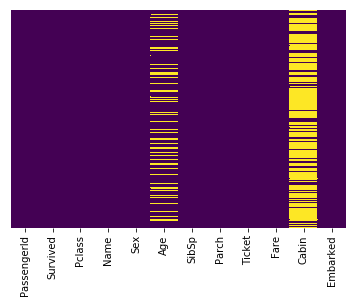

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

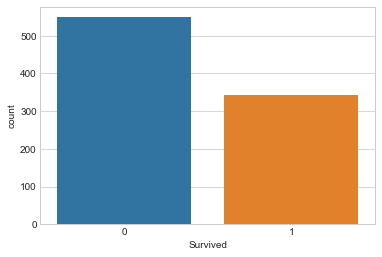

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

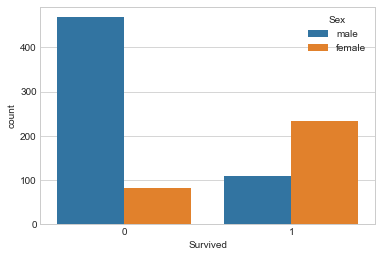

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train)

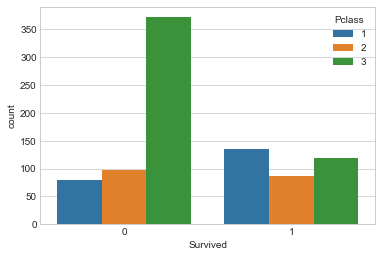

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

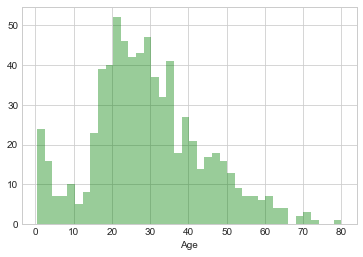

In [23]:
sns.distplot(train['Age'].dropna(),kde=False,color='green',bins=40)

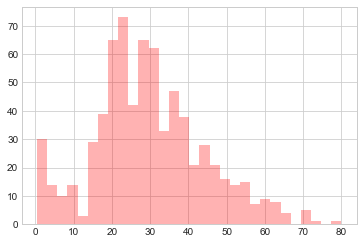

In [24]:
train['Age'].hist(bins=30,color='red',alpha=0.3)

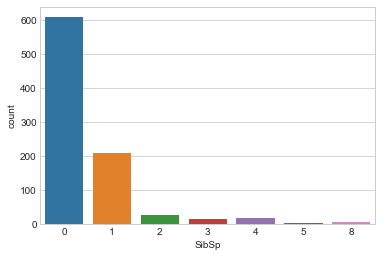

In [25]:
sns.countplot(x='SibSp',data=train)

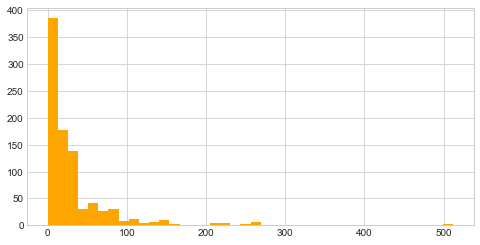

In [26]:
train['Fare'].hist(color='orange',bins=40,figsize=(8,4))

# Data Cleaning

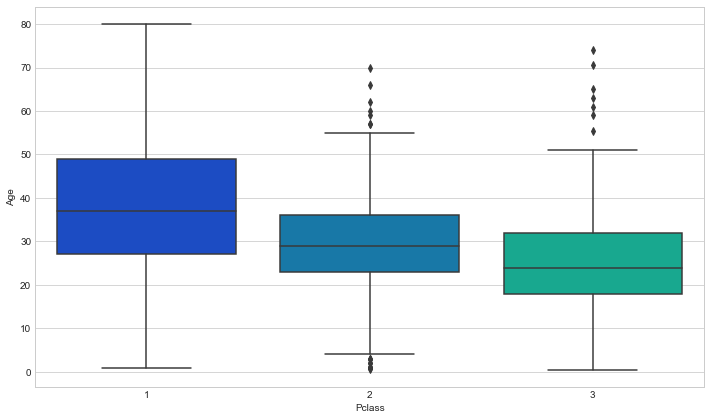

In [123]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

from the above graph we can see 25 percentile, 50 percentile, 75 percentile of all class. repalcing null values of age with the average value calculated from the boxplot 

In [124]:
#function to replace null age value with average value

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
            if Pclass == 1:
                return 37
            elif Pclass == 2:
                return 29
            else:
                return 24
    else:
        return Age

In [125]:
# applying function on the column age
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

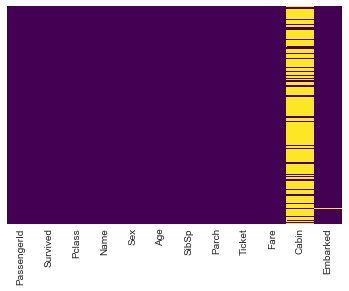

In [126]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Dropping the cabin because of lot of null values

In [127]:
train.drop('Cabin',axis=1,inplace=True)

In [128]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


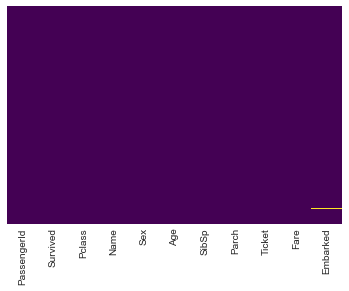

In [129]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [130]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

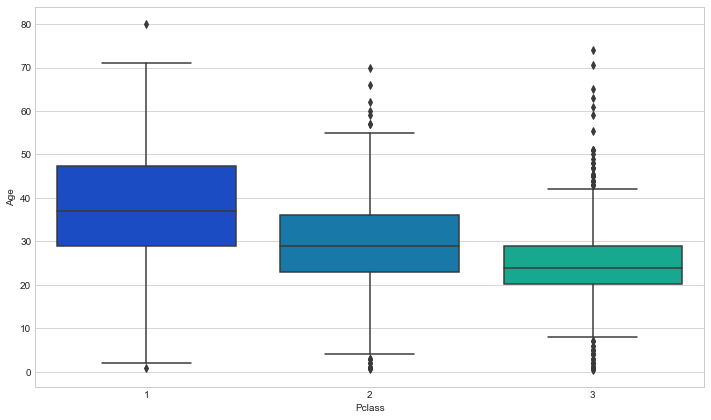

In [131]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [36]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25  

## convertig categorical data

In [132]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [133]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [134]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [135]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [136]:
train = pd.concat([train,sex,Embarked],axis=1)

In [137]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression Model


### Train Test Split

In [138]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [139]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'], test_size=0.30,
                                                   random_state=101)

## Traing and Predicting

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
prediction = logmodel.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
accuracy = confusion_matrix(y_test,prediction)

In [148]:
accuracy

array([[135,  19],
       [ 41,  73]], dtype=int64)

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.7761194029850746

In [151]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# Kaggle Submission

In [173]:
kaggle_test = pd.read_csv('test.csv')

In [174]:
kaggle_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [175]:
kaggle_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [176]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [177]:
kaggle_test.drop('Cabin',axis=1,inplace=True)


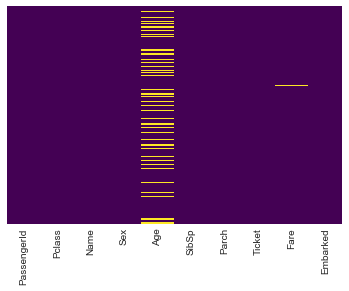

In [178]:
sns.heatmap(kaggle_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [179]:
#function to replace null age value with average value

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
            if Pclass == 1:
                return 37
            elif Pclass == 2:
                return 29
            else:
                return 24
    else:
        return Age

In [180]:
# applying function on the column age
kaggle_test['Age'] = kaggle_test[['Age','Pclass']].apply(impute_age,axis=1)

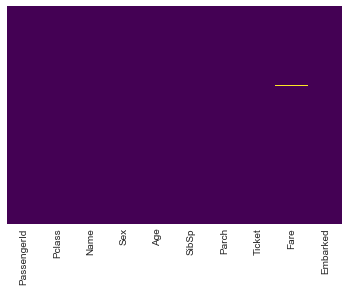

In [181]:
sns.heatmap(kaggle_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [182]:
# categoriaal data
sex = pd.get_dummies(kaggle_test['Sex'],drop_first=True)
Embarked = pd.get_dummies(kaggle_test['Embarked'],drop_first=True)

In [183]:
kaggle_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [184]:
kaggle_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [185]:
kaggle_test = pd.concat([train,sex,Embarked],axis=1)

In [186]:
kaggle_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1.0,1.0,0.0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0.0,0.0,1.0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1.0,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0.0,0.0,1.0


In [187]:
kaggle_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
male             0
Q                0
S                0
male           473
Q              473
S              473
dtype: int64

In [203]:
kaggle_test["PassengerID"] = kaggle_test["PassengerID"].astype(float)
kaggle_test["Survived"] = kaggle_test["Survived"].astype(float)
kaggle_test["Age"] = kaggle_test["Age"].astype(float)
kaggle_test["Pclass"] = kaggle_test["Pclass"].astype(float)
kaggle_test["SibSp"] = kaggle_test["male"].astype(float)
kaggle_test["male"] = kaggle_test["male"].astype(float)
kaggle_test["male"] = kaggle_test["male"].astype(float)
kaggle_test["male"] = kaggle_test["male"].astype(float)
kaggle_test["male"] = kaggle_test["male"].astype(float)
kaggle_test["male"] = kaggle_test["male"].astype(float)
kaggle_test["male"] = kaggle_test["male"].astype(float)
kaggle_test["male"] = kaggle_test["male"].astype(float)
kaggle_test["male"] = kaggle_test["male"].astype(float)

In [191]:
kaggle_test["male"].mean()
kaggle_test["male"].fillna(0.636, inplace = True) 

In [196]:
kaggle_test["male"] = kaggle_test["male"].astype(float)

In [192]:
kaggle_test["Q"].mean()
kaggle_test["Q"].fillna(0.0864, inplace = True) 

In [197]:
kaggle_test["Q"] = kaggle_test["Q"].astype(float)

In [193]:
kaggle_test["S"].mean()
kaggle_test["S"].fillna(0.7227, inplace = True) 

In [198]:
kaggle_test["S"] = kaggle_test["S"].astype(float)

In [200]:
kaggle_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
male             0
Q                0
S                0
male           473
Q              473
S              473
dtype: int64

In [201]:
prediction = logmodel.predict(kaggle_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').